Name: Kalkidan Tsegaye Gebresilassie
M machine learni
Task 1ng

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms

In [4]:
#Importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import plotly.express as px
import plotly.graph_objects as go

In [5]:
#Read the dataset from the Housing.csv file Using pandas
file = ('housing.csv')
H_data = pd.read_csv(file)
H_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Display basic information about the dataset
print("Step 2: Data Collection")
print("\nDataset loaded successfully.")
print("\nBasic Information About the Dataset:")
print("Number of Rows:", len(H_data))
print("Number of Columns:", len(H_data.columns))
print("\nSample Data (first 5 rows):")
print(H_data.head())

Step 2: Data Collection

Dataset loaded successfully.

Basic Information About the Dataset:
Number of Rows: 1460
Number of Columns: 81

Sample Data (first 5 rows):
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN     

In [7]:
#Checking the Number of rows and columns in the file  
H_data.shape

(1460, 81)

The H_data.info() function is used to obtain a concise overview of the H_data DataFrame. It displays essential information about the DataFrame, including:
-
The number of rows and columns in the DataFrame-.
The column names and their corresponding data type-s.
The count of non-null values in each colu-mn.
The memory usage of the DataFrame.

In [8]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The H_data.describe() function is applied to the H_data DataFrame, which provides an overview of the dataset's descriptive statistics. It computes various statistical measures on the numerical columns of the DataFrame

In [9]:
H_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Checking for missing values 
H_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

The above output shows the count of missing values for each column in the H_data DataFrame.

The column LotFrontage has 259 missing values, while the columns Id, MSSubClass, MSZoning, LotArea, and so on, have 0 missing values.

Checking for missing values is crucial in data analysis and preprocessing as missing values can affect the accuracy and reliability of the results. 

In [11]:
# Extract columns with null values
columns_with_null = [col for col in H_data.columns if H_data[col].isnull().any()]

# Display columns with null values
print("Columns with null values:")
for col in columns_with_null:
    print(col)# Check for missing values in each column
missing_values = H_data.isnull().sum()

# Print columns with missing values and their corresponding counts
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with null values:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


In [12]:
# Check for missing values in each column
missing_values = H_data.isnull().sum()

# Print columns with missing values and their corresponding counts
print("\nColumns with Missing Values:")
print(missing_values[missing_values > 0])


Columns with Missing Values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [13]:
# Check for duplicate rows
duplicates_before = H_data.duplicated().sum()

# Remove duplicate rows
H_data = H_data.drop_duplicates()

# Check for duplicate rows after removal
duplicates_after = H_data.duplicated().sum()

# Print the results
if duplicates_before > 0:
    print(f"Handling Duplicates\n{duplicates_before} duplicate row(s) were found and removed.")
else:
    print("Handling Duplicates\nNo duplicate rows found in the dataset.")

Handling Duplicates
No duplicate rows found in the dataset.


In [14]:
# Get the column names and data types
column_info = H_data.dtypes

# Display column names and data types horizontally
for col_name, data_type in column_info.items():  # Use items() instead of iteritems()
    print(f"{col_name}: {data_type}\n", end='')

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int6

The H_data.columns attribute is applied to the H_data DataFrame to retrieve the column names. It returns an Index object that contains the names of all the columns in the DataFrame.g.

In [15]:
H_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The code below creates a 3D scatter plot using the plotly.express library. This plot visualizes the relationship between three variables: LotArea, LotFrontage, and SalePrice.

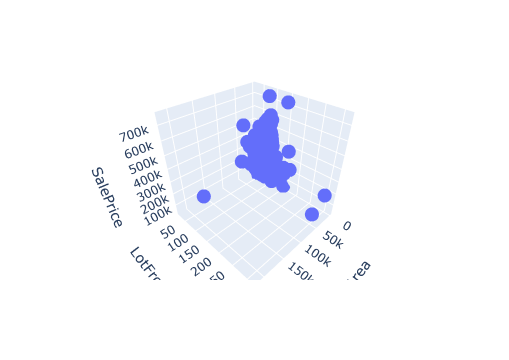

In [17]:
fig = px.scatter_3d(H_data,x = 'LotArea', y='LotFrontage',z = 'SalePrice')
fig.show()


Understanding the correlation between various features in the dataset

Correlation: refers to the statistical relationship or association between two variables. .

Positive correlation:
A positive correlation implies that as one variable increases, the other variable also tends to increase s . .

Negative correlation:
A negative correlation suggests that as one variable increases, the other variable tends to decre bies.

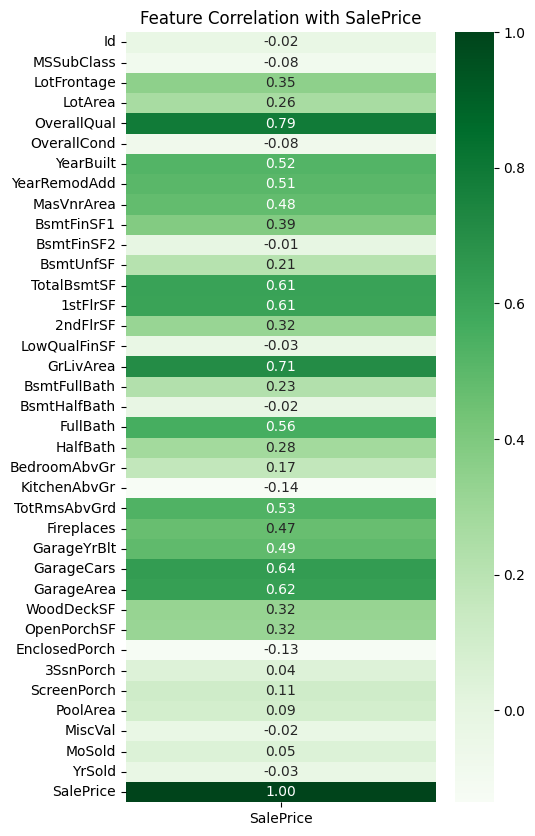

In [23]:
# Select numerical columns
H_data = H_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = H_data.corr()

# Step 2: Generate a heatmap
plt.figure(figsize=(5, 10))
sns.heatmap(correlation_matrix[['SalePrice']], cmap='Greens', fmt=".2f", cbar=True, annot=True, annot_kws={'size':10})
plt.title("Feature Correlation with SalePrice")
plt.show()

Spliting the data into Training data and Test data

In [29]:
# Split the data into training and testing sets
X = H_data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath',"FullBath", "HalfBath"]]
Y = H_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
print(X)
print(Y)

      TotalBsmtSF  BedroomAbvGr  BsmtFullBath  BsmtHalfBath  FullBath  \
0             856             3             1             0         2   
1            1262             3             0             1         2   
2             920             3             1             0         2   
3             756             3             1             0         1   
4            1145             4             1             0         2   
...           ...           ...           ...           ...       ...   
1455          953             3             0             0         2   
1456         1542             3             1             0         2   
1457         1152             4             0             0         2   
1458         1078             2             1             0         1   
1459         1256             3             1             0         1   

      HalfBath  
0            1  
1            0  
2            1  
3            0  
4            1  
...        ...  
1455

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(1460, 6) (1168, 6) (292, 6)


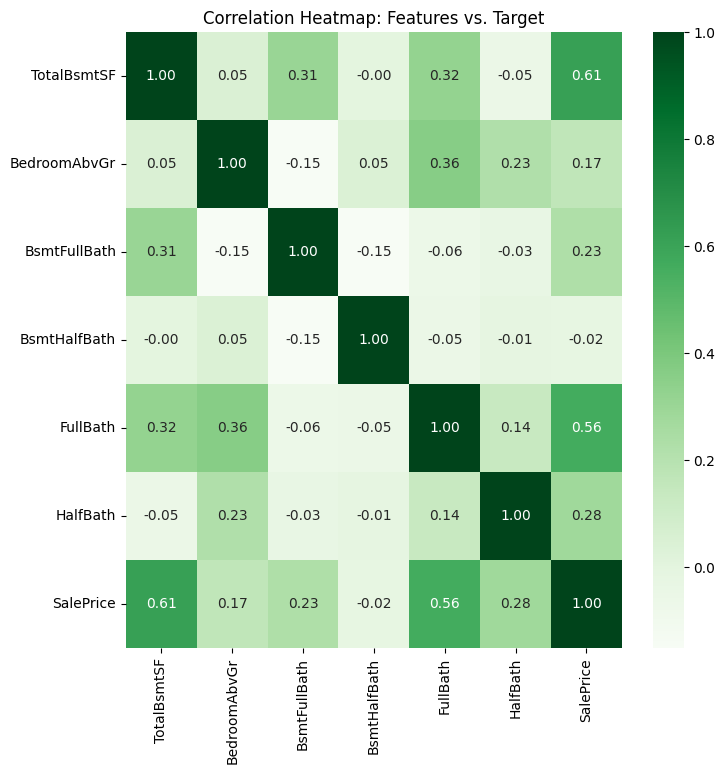

In [32]:
# Select the columns of interest (features and target)
features = H_data[['TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']]
target = H_data[['SalePrice']]

# Create a new DataFrame with only the selected columns
data_subset = pd.concat([features, target], axis=1)  # Use square brackets and specify axis=1

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title("Correlation Heatmap: Features vs. Target")
plt.show()

The detectOutliers() function aims to detect outliers in the dataset by creating a set of boxplots using the sns.boxplot() function from the seaborn library.

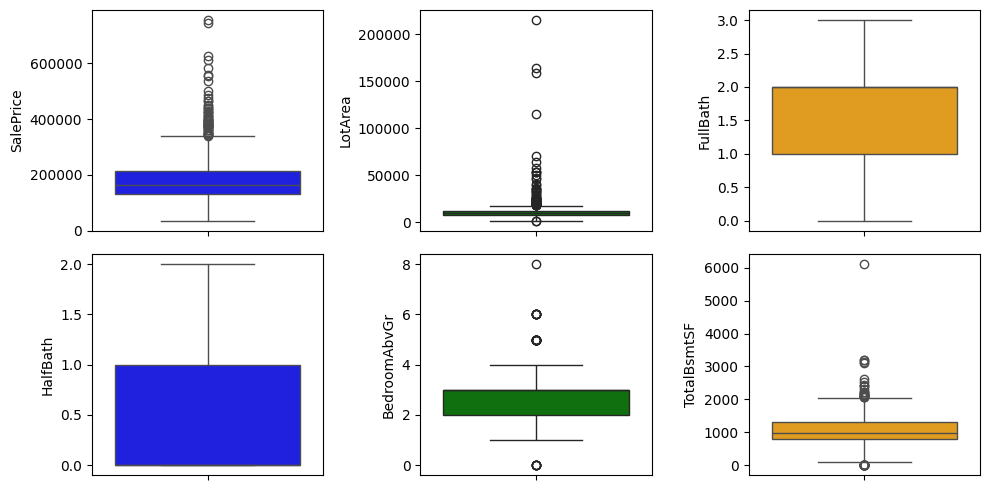

In [35]:
def detectOutliers():
    fig, axs = plt.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(H_data['SalePrice'], ax = axs[0,0], color='blue')
    plt2 = sns.boxplot(H_data['LotArea'], ax = axs[0,1], color='green')
    plt3 = sns.boxplot(H_data['FullBath'], ax = axs[0,2], color='orange')
    plt1 = sns.boxplot(H_data['HalfBath'], ax = axs[1,0], color='blue')
    plt2 = sns.boxplot(H_data['BedroomAbvGr'], ax = axs[1,1], color='green')
    plt3 = sns.boxplot(H_data['TotalBsmtSF'], ax = axs[1,2], color='orange')
    plt.tight_layout()
detectOutliers()

In [36]:
# Outlier reduction for price
Q1 = H_data.SalePrice.quantile(0.25)
Q3 = H_data.SalePrice.quantile(0.75)
IQR = Q3 - Q1
H_data = H_data[(H_data.SalePrice >= Q1 - 1.5*IQR) & (H_data.SalePrice <= Q3 + 1.5*IQR)]
# Outlier reduction for area
Q1 = H_data.LotArea.quantile(0.25)
Q3 = H_data.LotArea.quantile(0.75)
IQR = Q3 - Q1
H_data = H_data[(H_data.LotArea >= Q1 - 1.5*IQR) & (H_data.LotArea <= Q3 + 1.5*IQR)]

# Outlier reduction for area
Q1 = H_data.BedroomAbvGr.quantile(0.25)
Q3 = H_data.BedroomAbvGr.quantile(0.75)
IQR = Q3 - Q1
H_data = H_data[(H_data.BedroomAbvGr >= Q1 - 1.5*IQR) & (H_data.BedroomAbvGr <= Q3 + 1.5*IQR)]

# Outlier reduction for area
Q1 = H_data.HalfBath.quantile(0.25)
Q3 = H_data.HalfBath.quantile(0.75)
IQR = Q3 - Q1
H_data = H_data[(H_data.HalfBath >= Q1 - 1.5*IQR) & (H_data.HalfBath <= Q3 + 1.5*IQR)]

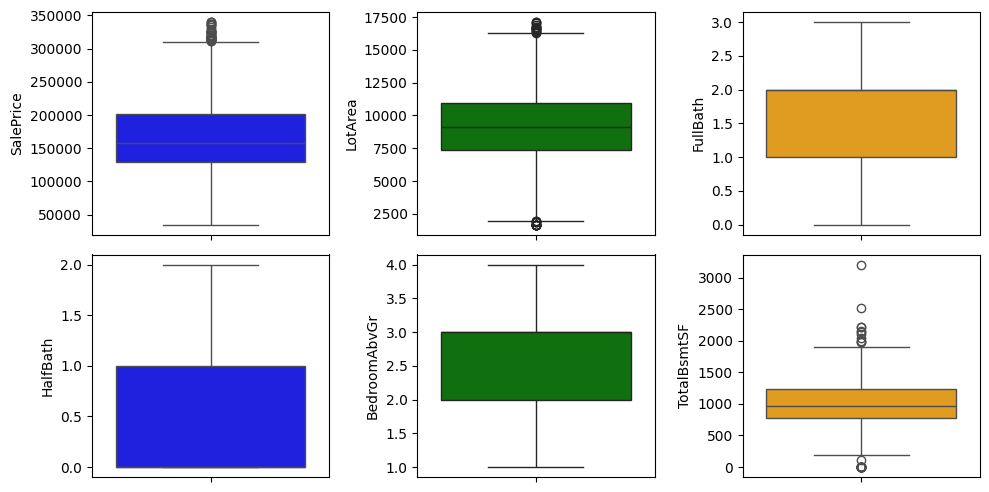

In [37]:
detectOutliers()

In [38]:
# Missing values in selected features
features_missing_values = X.isnull().sum()
features_missing_values

TotalBsmtSF     0
BedroomAbvGr    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
dtype: int64

In [39]:
H_data.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Performing linear regression, which is a machine learning technique used to predict a continuous target variable based on one or more input features.

In [40]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = lr_model.predict(X_test)

In [42]:
r2 = round(r2_score(y_test,y_pred),5)
print('Coefficient of determination R2: ', r2)

Coefficient of determination R2:  0.64888


Text(0.5, 1.0, 'Scatter chart - Linear regression model')

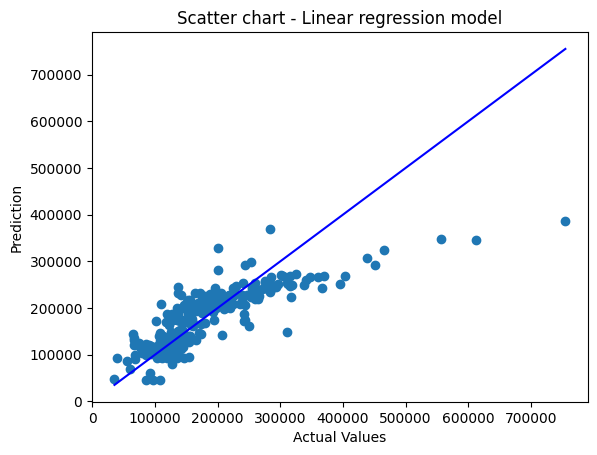

In [43]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')